In [77]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [78]:
Non_Demented = []
Mild_Dementia = []
Moderate_Dementia = []
Very_mild_Dementia = []
for dirname, _, filenames in os.walk('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Non Demented'):
    for filename in filenames:
        Non_Demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Mild Dementia'):
    for filename in filenames:
        Mild_Dementia.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Moderate Dementia'):
    for filename in filenames:
        Moderate_Dementia.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Very mild Dementia'):
    for filename in filenames:
        Very_mild_Dementia.append(os.path.join(dirname, filename))  

In [79]:
Non_Demented = Non_Demented[0:67222]
Mild_Dementia = Mild_Dementia[0:5002]
Moderate_Dementia = Moderate_Dementia[0:488]
Very_mild_Dementia = Very_mild_Dementia[0:13725]

In [80]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [81]:
data = []
result = []
for path in Non_Demented:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in Mild_Dementia:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in Moderate_Dementia:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in Very_mild_Dementia:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [82]:
data = np.array(data)
data.shape

(86437, 128, 128, 3)

In [83]:
result = np.array(result)
result = result.reshape((86437,4))

result.shape

(86437, 4)

In [84]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=42)

In [85]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

C:\Users\ibrah\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [86]:
y_train.shape  

(69149, 4)

In [87]:
x_train.shape

(69149, 128, 128, 3)

In [88]:
history = model.fit(x_train,y_train,epochs=32,batch_size=32,verbose=1,validation_data=(x_test,y_test))

Epoch 1/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2094s 965ms/step - accuracy: 0.7911 - loss: 1.6036 - val_accuracy: 0.9310 - val_loss: 0.1928
Epoch 2/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2081s 963ms/step - accuracy: 0.9452 - loss: 0.1401 - val_accuracy: 0.9916 - val_loss: 0.0277
Epoch 3/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2086s 965ms/step - accuracy: 0.9798 - loss: 0.0557 - val_accuracy: 0.9988 - val_loss: 0.0042
Epoch 4/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2113s 978ms/step - accuracy: 0.9876 - loss: 0.0344 - val_accuracy: 0.9984 - val_loss: 0.0051
Epoch 5/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2109s 976ms/step - accuracy: 0.9921 - loss: 0.0235 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 6/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2105s 974ms/step - accuracy: 0.9936 - loss: 0.0188 - val_accuracy: 0.9997 - val_loss: 0.0034
Epoch 7/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2111s 977ms/step - accuracy: 0.9947 - loss: 0.0154 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 8/32
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 2112s 977ms/s

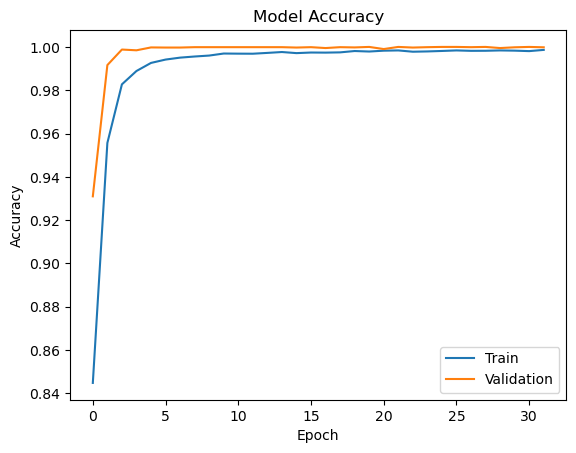

In [89]:
# Assuming 'history' contains training and validation accuracy values
plt.plot(history.history['accuracy'])        # Training accuracy
plt.plot(history.history['val_accuracy'])    # Validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')  # Legend labels for training and validation
plt.show()

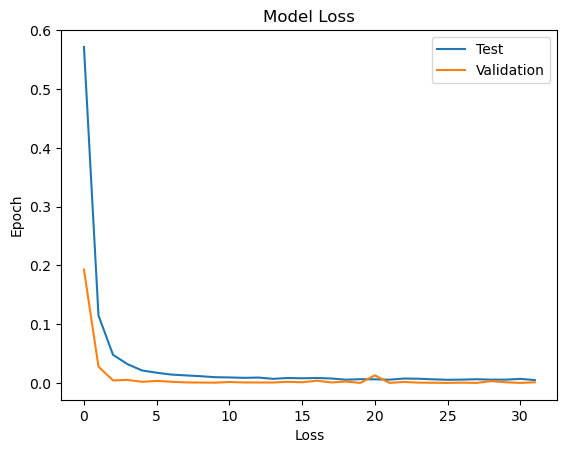

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [92]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [93]:
average_train_accuracy = np.mean(train_accuracy)
average_val_accuracy = np.mean(val_accuracy)
average_train_loss = np.mean(train_loss)
average_val_loss = np.mean(val_loss)

In [94]:
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {average_val_accuracy:.4f}")
print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Validation Loss: {average_val_loss:.4f}")

Average Training Accuracy: 0.9905
Average Validation Accuracy: 0.9973
Average Training Loss: 0.0314
Average Validation Loss: 0.0086


In [95]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia 

99.99767541885376% Confidence This Is Non Demented


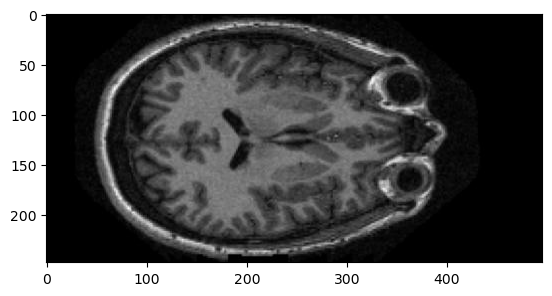

In [96]:
from matplotlib.pyplot import imshow
img = Image.open('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Non Demented/OAS1_0349_MR1_mpr-3_121.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Mild Dementia


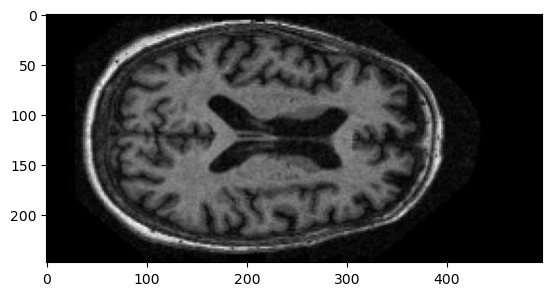

In [98]:
from matplotlib.pyplot import imshow
img = Image.open('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Mild Dementia/OAS1_0269_MR1_mpr-4_138.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Moderate Dementia


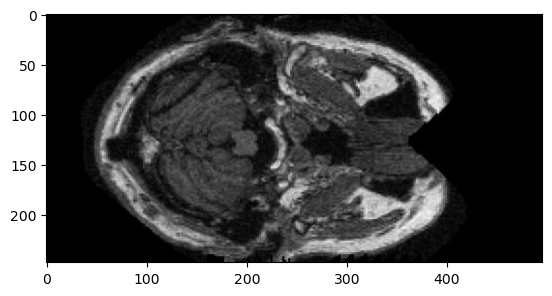

In [99]:
img = Image.open('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Moderate Dementia/OAS1_0351_MR1_mpr-1_105.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Very Mild Dementia


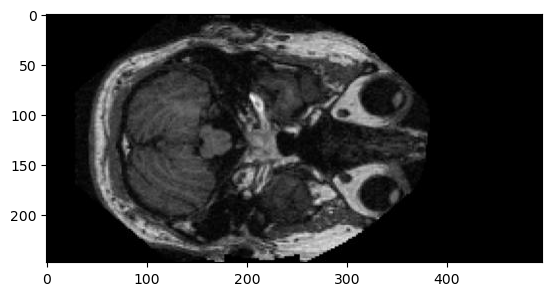

In [100]:
img = Image.open('C:/Users/ibrah/Desktop/HCT STUFF/4th yr Semeter-2/BTECH-B PROJECT/ml/DATASETS/Data/Very mild Dementia/OAS1_0315_MR1_mpr-4_109.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))